In [2]:
import pandas as pd 
import datetime
import pandas_datareader.data as web
from pandas import Series,DataFrame

In [3]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2017,1,11)

In [4]:
df = web.DataReader("AAPL",'yahoo',start,end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.609884
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.917688
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.173399
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,28.201811
2017-01-11,29.982500,29.650000,29.684999,29.937500,110354400.0,28.353342


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1517 entries, 2011-01-03 to 2017-01-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1517 non-null   float64
 1   Low        1517 non-null   float64
 2   Open       1517 non-null   float64
 3   Close      1517 non-null   float64
 4   Volume     1517 non-null   float64
 5   Adj Close  1517 non-null   float64
dtypes: float64(6)
memory usage: 83.0 KB


In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1517.000000,1517.000000,1517.000000,1517.000000,1.517000e+03,1517.000000
mean,21.850493,21.446087,21.656727,21.650913,3.387311e+08,19.514529
std,6.094141,6.000622,6.049483,6.048385,2.163409e+08,5.915819
min,11.346429,11.089286,11.310000,11.261429,4.590360e+07,9.714680
25%,16.356428,16.056786,16.275356,16.200714,1.811712e+08,14.184442
50%,21.702143,21.355000,21.530001,21.586786,2.835980e+08,18.789160
75%,27.250000,26.795000,27.057501,27.045000,4.353804e+08,25.029079
max,33.634998,32.849998,33.615002,33.250000,1.880998e+09,30.430048


In [8]:
# Rolling Mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [9]:
mavg.tail()

Date
2017-01-05    26.503308
2017-01-06    26.524592
2017-01-09    26.548668
2017-01-10    26.573406
2017-01-11    26.599989
Name: Adj Close, dtype: float64

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

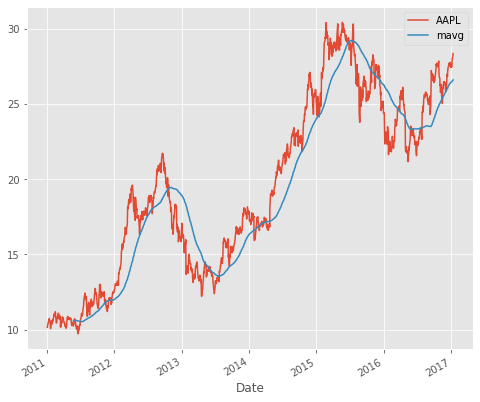

In [11]:
mpl.rc('figure',figsize = (8,7))
mpl.__version__
style.use('ggplot')
close_px.plot(label="AAPL")
mavg.plot(label = "mavg")
plt.legend()


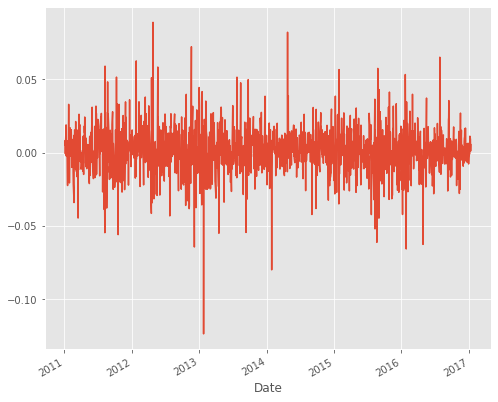

In [12]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return') # shows 10% drop in 2013

In [13]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],
                        'yahoo',start=start,end=end)['Adj Close']

# Correlation Analysis with competitors



In [14]:
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2017-01-05,27.609884,27.813232,794.020020,140.874130,58.410725
2017-01-06,27.917688,27.892647,806.150024,141.567230,58.917015
2017-01-09,28.173399,27.760288,806.650024,139.997330,58.729496
2017-01-10,28.201811,27.680870,804.789978,138.218674,58.710747
2017-01-11,28.353342,27.769110,807.909973,140.080826,59.245159


In [15]:
 # how much the price changes compared to the previous day which defines returns.
retscomp = dfcomp.pct_change() 

In [16]:
corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.349487,0.378100,0.349272,0.366415
GE,0.349487,1.000000,0.423455,0.524907,0.461027
GOOG,0.378100,0.423455,1.000000,0.389329,0.464979
IBM,0.349272,0.524907,0.389329,1.000000,0.472503
MSFT,0.366415,0.461027,0.464979,0.472503,1.000000


Text(0, 0.5, 'Returns GE')

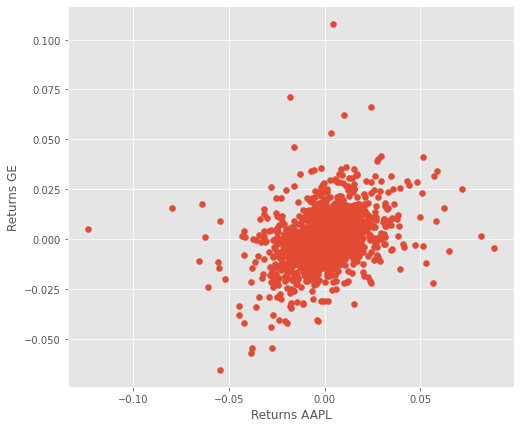

In [17]:
# plot Apple and GE to view return distribs
plt.scatter(retscomp.AAPL,retscomp.GE)
plt.xlabel("Returns AAPL")
plt.ylabel("Returns GE")

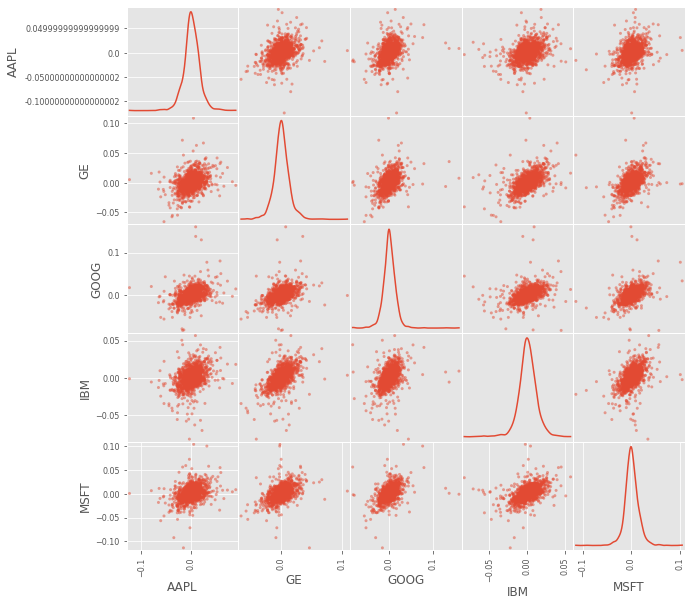

In [18]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));


([<matplotlib.axis.YTick at 0x7ff537b245f8>,
 [Text(0, 0, 'AAPL'),
  Text(0, 0, 'GE'),
  Text(0, 0, 'GOOG'),
  Text(0, 0, 'IBM'),
  Text(0, 0, 'MSFT')])

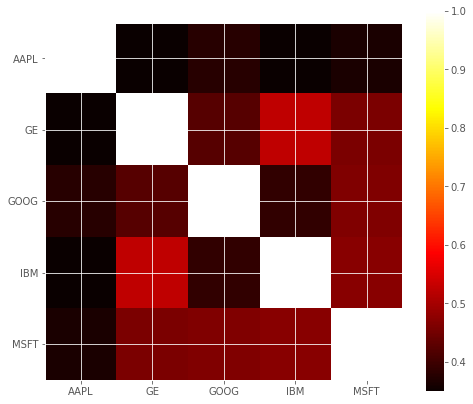

In [19]:
plt.imshow(corr,cmap='hot',interpolation=None)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

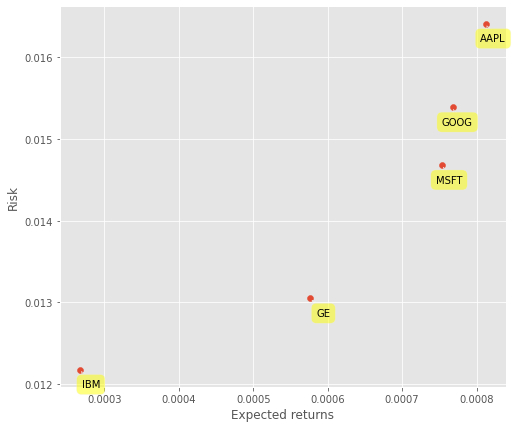

In [20]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Feature Engineering

In [21]:
# We will use 3 ML models  --> Simple Linear analysis , QDA , KNN


In [22]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [23]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2017-01-05,27.609884,88774400.0,0.900440,0.595240
2017-01-06,27.917688,127007600.0,1.433299,0.967636
2017-01-09,28.173399,134247600.0,1.252204,0.881730
2017-01-10,28.201811,97848400.0,0.906720,0.286271
2017-01-11,28.353342,110354400.0,1.110649,0.850600


In [24]:
# 1. fill missing data
dfreg.fillna(-99999 , inplace=True)

In [25]:
# 2. separate 1 % data to forecast
import math 
forecast_out = int(math.ceil(0.01*len(dfreg))) 

In [26]:
# 3. Separating the label here, we want to predict the AdjClose
import numpy as np
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'],1)) # separating features from target
# X has all column except label

In [27]:
# Scaling X => everyone can have same distribution for linear regression
from sklearn import preprocessing
X = preprocessing.scale(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [28]:
# Data Series of late X and early X (train) 
# for model generation + evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [29]:
# separate label and identify it as y i.e. target
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [33]:
# Linear Regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [34]:
# Quadratic Regression 2 
clfpoly2 = make_pipeline(PolynomialFeatures(2),Ridge())
clfpoly2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [35]:
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3),Ridge())
clfpoly3.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [36]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [37]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)


print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.953813251986725
0.9552400461110011
0.9487111712075873
0.9222329740303137


In [38]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set)

[27.65392044 27.66789696 27.66051674 27.49879632 27.62486565 27.80773422
 27.72286327 27.64030291 27.45724654 27.52897787 27.45393662 27.61495904
 27.92652161 28.13834186 28.16504011 28.32296248]


In [39]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

In [40]:
for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

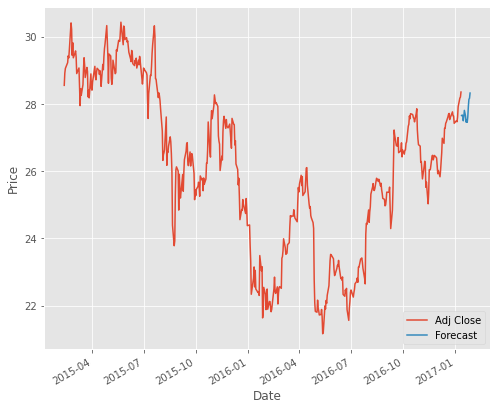

In [44]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()